<a href="https://colab.research.google.com/github/alexsvgithub/Text-Summarization/blob/main/PBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

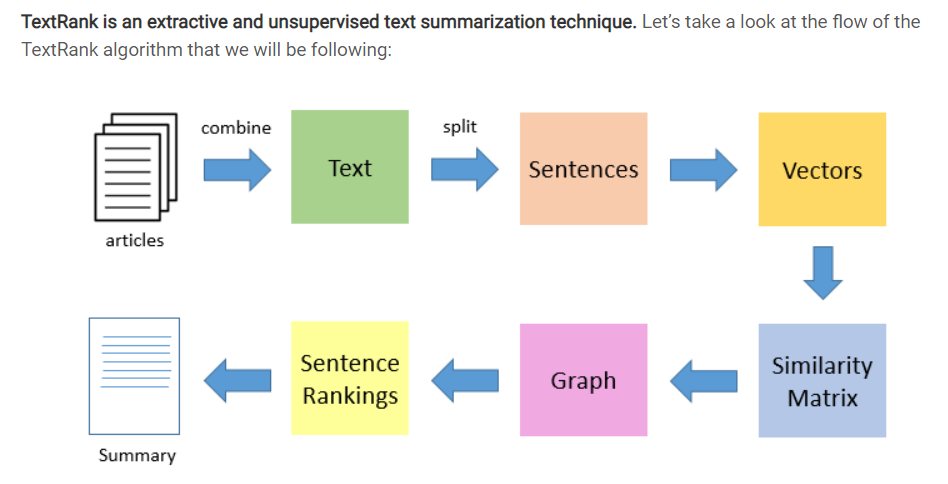

***We will be using the pre-trained Wikipedia 2014 + Gigaword 5 GloVe vectors available here. Heads up – the size of these word embeddings is 822 MB.***

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

---
**Here we Imported required library**






In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
import re

---
**Input is taken**

In [ ]:
df = input("Enter the text to summarize: ")
print(df)
len(df)

---
**Split Text into Sentences**

Now the next step is to break the text into individual sentences. We will use the sent_tokenize( ) function of the nltk library to do this.

In [ ]:
from nltk.tokenize import sent_tokenize
sentences = []

sentences.append(sent_tokenize(df))

#sentences = [y for x in sentences for y in x] # flattern list(Seperate on the basis of fullstop (.))

print(sentences)

---
**Extracting the words embeddings or word vectors**

In [42]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [ ]:
len(word_embeddings)

**We have word vectors for 400000 different terms stored in the dictionary {word_embeddings}**

---
**Cleaning the data** 

In [44]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [df.lower() for s in clean_sentences]

---
Get rid of the stopwords like - **is, am, the, of, in, etc.**

In [ ]:
nltk.download('stopwords')

In [46]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [47]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [ ]:
# remove stopwords from the sentences

clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]
print(clean_sentences)

---

**Vector Representation of Sentences**

In [49]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

****
**Create Vectors for our Sentences**

We will first fetch vectors (each of size 100 elements) for the constituent words in a sentence and then take mean/average of those vectors to arrive at a consolidated vector for the sentence.


In [50]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

---
**Similarity Matrix Preparation**

In [51]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

We will use Cosine Similarity to compute the similarity between a pair of sentences.

In [52]:
from sklearn.metrics.pairwise import cosine_similarity

And initialize the matrix with cosine similarity scores

In [53]:
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

---
**Applying PageRank Algorithm**

Converting the similarity matrix sim_mat into a graph. The nodes of this graph will represent the sentences and the edges will represent the similarity scores between the sentences. On this graph, we will apply the PageRank algorithm to arrive at the sentence rankings.

In [54]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

---
**Summary Extraction**

Finally, it’s time to extract the top N sentences based on their rankings for summary generation.

In [55]:
ranked_sentences = sorted(((scores[i],df) for i,df in enumerate(sentences)), reverse=True)
#print(ranked_sentences[0][1])

In [ ]:
final = []
count=0
# Extract top 10 sentences as the summary
for i in range (0,3):
  print(ranked_sentences[0][1][i])




# **Reference**

https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/